In [1]:
# %matplotlib_svg
import pandas as pd
import numpy as np
import pylab as pl
pd.set_option("display.show_dimensions", False)
pd.set_option("display.float_format", "{:4.2g}".format)
df_soil = pd.read_csv("data/Soils-simple.csv", index_col=[0, 1], usecols=range(6))

## 数值运算函数

In [2]:
print(df_soil)

                   pH  Dens   Ca  Conduc
Depth Contour                           
0-10  Depression  5.4  0.98   11     1.5
      Slope       5.5   1.1   12       2
      Top         5.3     1   13     1.4
10-30 Depression  4.9   1.4  7.5     5.5
      Slope       5.3   1.3  9.5     4.9
      Top         4.8   1.3   10     3.6


In [6]:
df_soil.mean()
df_soil.mean(axis=1)
df_soil.groupby(level=1).mean()

,pH,Dens,Ca,Conduc
Contour,,,,
Depression,5.1,1.2,9.1,3.5
Slope,5.4,1.2,11,3.5
Top,5.1,1.2,12,2.5


In [7]:
s = pd.Series(dict(Depression=0.9, Slope=1.2))
df_soil.Ca.mul(s, level=1, fill_value=1)

Depth  Contour   
0-10   Depression    9.6
       Slope          15
       Top            13
10-30  Depression    6.8
       Slope          11
       Top            10
dtype: float64

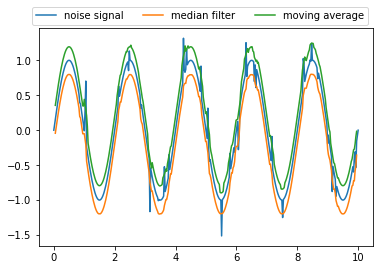

In [8]:
#%fig=中值滤波和移动平均
t = np.linspace(0, 10, 400)
x = np.sin(0.5*2*np.pi*t)
x[np.random.randint(0, len(t), 40)] += np.random.normal(0, 0.3, 40)
s = pd.Series(x, index=t)
s_mean = s.rolling(5,center=True).mean()
s_median = s.rolling(5,center=True).median()
#%hide
ax = s.plot(label="noise signal")
(s_median - 0.2).plot(ax=ax, label="median filter")
(s_mean + 0.2).plot(ax=ax, label="moving average")
ax.legend(loc="best", ncol=3, bbox_to_anchor=(0., 1.02, 1., .102));

> **QUESTION**

> 请读者思考如何使用NumPy提供的ufunc函数计算`ref:fig-next`中的三条曲线。

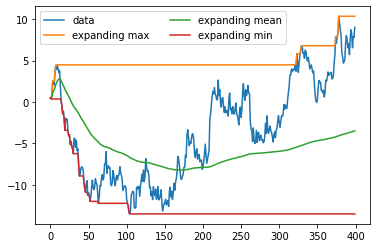

In [9]:
#%fig=用`expanding_*`计算历史最大值、平均值、最小值
np.random.seed(42)
x = np.cumsum(np.random.randn(400))
s=pd.Series(x)
x_max=s.expanding().max() #窗口函数 你好
x_min=s.expanding().min()
x_mean=s.expanding().mean()
#%hide
df = pd.DataFrame(np.c_[x, x_max, x_mean, x_min], 
                  columns=["data", "expanding max", "expanding mean", "expanding min"])
ax = df.plot()
ax.legend(ncol=2, loc="upper left");